In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/final files/heart.csv')

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


<Axes: xlabel='ChestPainType', ylabel='count'>

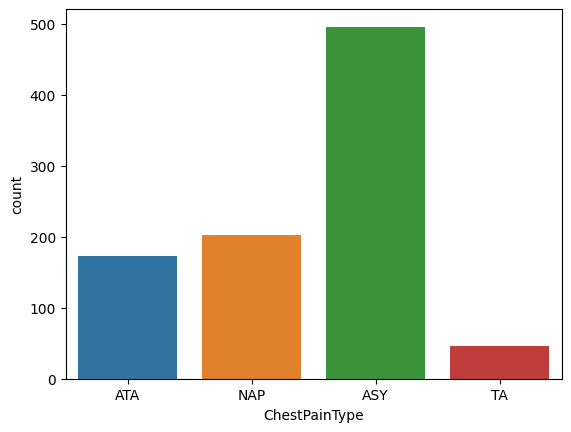

In [ ]:
sns.countplot(x='ChestPainType',data=df)

<Axes: xlabel='RestingBP', ylabel='Count'>

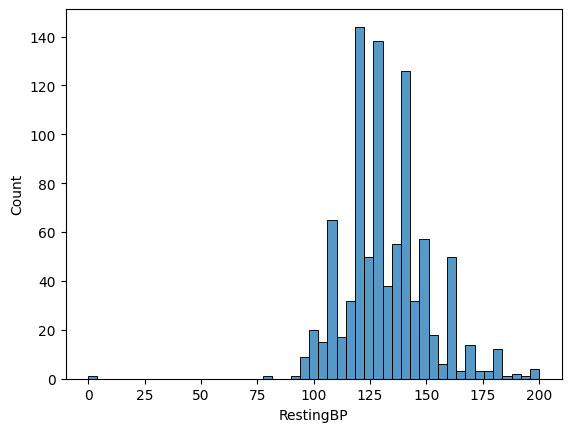

In [ ]:
sns.histplot(x='RestingBP',data=df)

<Axes: xlabel='Cholesterol'>

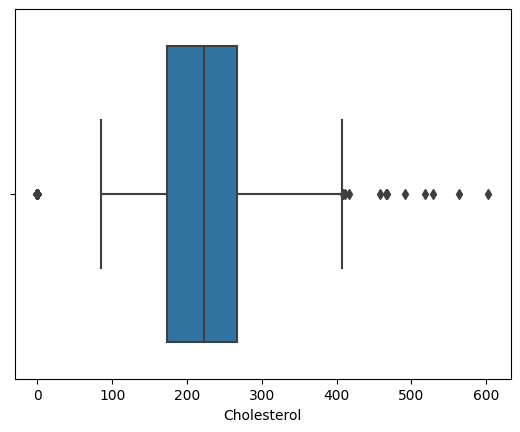

In [ ]:
sns.boxplot(x='Cholesterol',data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex']=label.fit_transform(df['Sex'])
df['ChestPainType']=label.fit_transform(df['ChestPainType'])
df['RestingECG']=label.fit_transform(df['RestingECG'])
df['ExerciseAngina']=label.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=label.fit_transform(df['ST_Slope'])

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

<Axes: xlabel='HeartDisease', ylabel='count'>

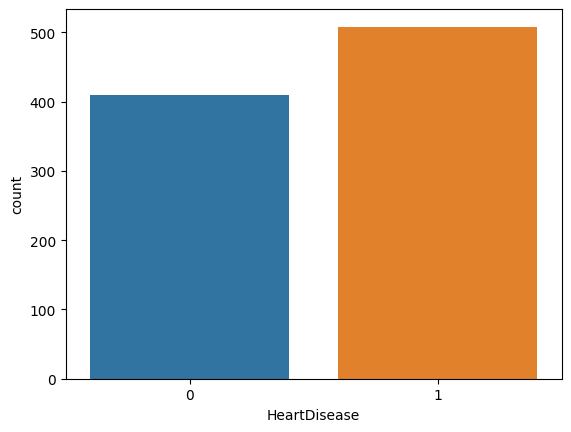

In [ ]:
sns.countplot(x='HeartDisease',data=df)

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn as imb
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample=RandomOverSampler(sampling_strategy='minority')

In [ ]:
X_over,y_over=oversample.fit_resample(X_train,y_train)

In [ ]:
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
arr_acc=np.array([])
arr_f1=np.array([])
classifier=Sequential()
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
for i in range(1,30):
  classifier.fit(X_over, y_over, batch_size = 918, epochs = 100)
  pred=classifier.predict(X_test)
  y_pred=(pred>0.5)
  arr_acc=np.append(arr_acc,metrics.accuracy_score(y_test,y_pred))
  arr_f1=np.append(arr_f1,metrics.f1_score(y_test,y_pred))

In [ ]:
pred=classifier.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
y_pred=(pred>0.5)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
metrics.accuracy_score(y_test,y_pred)
metrics.f1_score(y_test,y_pred)
metrics.precision_score(y_test,y_pred)
metrics.recall_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
cm

array([[72,  5],
       [41, 66]])

In [ ]:
arr_acc.mean()
arr_f1.mean()

0.8367930323750027

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()



In [ ]:
from sklearn.model_selection import GridSearchCV
grid={'max_depth':[3,6,9,12,15,18],'n_estimators':[25,50,75,100,150,200]}
opti=GridSearchCV(RF,grid,scoring='accuracy')
opti.fit(X_over,y_over)
opti.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=200)

In [ ]:
RF=RandomForestClassifier(max_depth=15, n_estimators=150)
RF.fit(X_over,y_over)
y_pred2=RF.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred2)
metrics.f1_score(y_test,y_pred2)

0.9014084507042254